In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [8]:
# Use tuple to show lat/lng combos.
for coordinate in coordinates:
    print (citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


ola ru
albany au
talara pe
illoqqortoormiut gl
hobart au
mataura pf
chokurdakh ru
ust-kuyga ru
vaini to
yar-sale ru
torbay ca
verkhnetulomskiy ru
punta arenas cl
tarudant ma
taolanaro mg
christchurch nz
qingdao cn
mataura pf
mandera ke
brigantine us
bowen au
mildura au
saint-philippe re
saint-philippe re
vaini to
orlik ru
krasnovishersk ru
mahebourg mu
avarua ck
norman wells ca
havelock us
nianzishan cn
aksarka ru
saint anthony ca
costinesti ro
puerto ayora ec
albany au
busselton au
kaitangata nz
kaitangata nz
barrow us
rikitea pf
jipapad ph
victor harbor au
itarema br
cherskiy ru
yellowknife ca
butaritari ki
port elizabeth za
tasiilaq gl
mar del plata ar
rio grande br
hithadhoo mv
busselton au
alpena us
saint-philippe re
illoqqortoormiut gl
coihaique cl
ampanihy mg
castro cl
mataura pf
khatanga ru
rungata ki
orlik ru
busselton au
airai pw
tual id
cidreira br
deputatskiy ru
san juan de colon ve
tasiilaq gl
salta ar
port alfred za
kapaa us
port alfred za
sitka us
saint-philippe re
thomp

taolanaro mg
butaritari ki
alta gracia ar
myitkyina mm
mananjary mg
immokalee us
daugavpils lv
klaksvik fo
esperance au
jiroft ir
coahuayana mx
tilichiki ru
mar del plata ar
hunza pk
karaul ru
jardim br
barentsburg sj
khatanga ru
torbay ca
roswell us
illoqqortoormiut gl
busselton au
kuusamo fi
salalah om
tasiilaq gl
busselton au
samusu ws
illoqqortoormiut gl
polyarnyy ru
carnarvon au
antalaha mg
haibowan cn
mataura pf
samusu ws
gamba ga
padang id
beringovskiy ru
punta arenas cl
queanbeyan au
rochester us
port alfred za
torbay ca
punta arenas cl
hamilton bm
mar del plata ar
taolanaro mg
prince rupert ca
beirut lb
vaini to
vaini to
cape town za
freeport bs
half moon bay us
ketchikan us
provideniya ru
busselton au
ushuaia ar
meyungs pw
mataura pf
batemans bay au
kulhudhuffushi mv
laguna br
nikolskoye ru
hermanus za
albany au
jamestown sh
vaitape pf
vaini to
beidao cn
ushuaia ar
gat ly
novyy urgal ru
ancud cl
namibe ao
voh nc
mar del plata ar
punta arenas cl
mataura pf
tuktoyaktuk ca
vaini

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
# Create endpoint URL with each city.
        city_url = url + "&q=" + city.replace(" ","+")

# Log the URL, record, and set numbers and the city.
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
# Add 1 to the record count.
        record_count += 1
    
# Run an API request for each of the cities.
        try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | ola
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | talara
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | ust-kuyga
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | yar-sale
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | verkhnetulomskiy
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | tarudant
City not found. Skipping...
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | christchurch
Processing Record 17 of Set 1 | qingdao
Processing Record 18 of Set 1 | mandera
Processing Record 19 of Set 1 | brigantine
Processing Record 20 of Set 1 | bowen
Processing Record 21 of Set 1 | mildura
Processing Record 22 of Set 1 | saint-philippe
Processing

Processing Record 39 of Set 4 | tshane
Processing Record 40 of Set 4 | petauke
Processing Record 41 of Set 4 | capao da canoa
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | tiznit
Processing Record 44 of Set 4 | gamba
Processing Record 45 of Set 4 | port blair
Processing Record 46 of Set 4 | villa carlos paz
Processing Record 47 of Set 4 | shakawe
Processing Record 48 of Set 4 | general higinio morinigo
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | pachino
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | vigrestad
Processing Record 3 of Set 5 | rio cuarto
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | saint-pierre
Processing Record 6 of Set 5 | nioro
Processing Record 7 of Set 5 | faanui
Processing Record 8 of Set 5 | sukhobezvodnoye
Processing Record 9 of Set 5 | arraial do cabo
Processing Record 10 of Set 5 | bethel
Processing Record 11 of Set 5 | cara

Processing Record 26 of Set 8 | umm kaddadah
Processing Record 27 of Set 8 | vikarabad
Processing Record 28 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 29 of Set 8 | takoradi
Processing Record 30 of Set 8 | tuensang
Processing Record 31 of Set 8 | samusu
City not found. Skipping...
Processing Record 32 of Set 8 | vardo
Processing Record 33 of Set 8 | hervey bay
Processing Record 34 of Set 8 | road town
Processing Record 35 of Set 8 | steinbach
Processing Record 36 of Set 8 | alta gracia
Processing Record 37 of Set 8 | myitkyina
Processing Record 38 of Set 8 | mananjary
Processing Record 39 of Set 8 | immokalee
Processing Record 40 of Set 8 | daugavpils
Processing Record 41 of Set 8 | jiroft
City not found. Skipping...
Processing Record 42 of Set 8 | coahuayana
Processing Record 43 of Set 8 | tilichiki
Processing Record 44 of Set 8 | hunza
City not found. Skipping...
Processing Record 45 of Set 8 | karaul
City not found. Skipping...
Processing Record 46 of Set 8 | j

Processing Record 16 of Set 12 | trelew
Processing Record 17 of Set 12 | canitas
City not found. Skipping...
Processing Record 18 of Set 12 | malpe
Processing Record 19 of Set 12 | ordynskoye
Processing Record 20 of Set 12 | tambul
City not found. Skipping...
Processing Record 21 of Set 12 | kouroussa
Processing Record 22 of Set 12 | kununurra
Processing Record 23 of Set 12 | cockburn town
Processing Record 24 of Set 12 | san fernando
Processing Record 25 of Set 12 | saint joseph
Processing Record 26 of Set 12 | juigalpa
Processing Record 27 of Set 12 | manaure
Processing Record 28 of Set 12 | mpulungu
Processing Record 29 of Set 12 | flin flon
Processing Record 30 of Set 12 | maarianhamina
Processing Record 31 of Set 12 | mehran
Processing Record 32 of Set 12 | chumikan
Processing Record 33 of Set 12 | mumbwa
Processing Record 34 of Set 12 | kahului
Processing Record 35 of Set 12 | demyansk
Processing Record 36 of Set 12 | ituni
City not found. Skipping...
Processing Record 37 of Set 

In [16]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ola,59.58,151.28,37.06,68,10,12.01,RU,2020-10-07 19:10:49
1,Albany,42.60,-73.97,64.00,53,100,1.99,US,2020-10-07 19:06:27
2,Talara,-4.58,-81.27,77.00,61,1,16.11,PE,2020-10-07 19:10:49
3,Hobart,-42.88,147.33,51.80,81,90,8.05,AU,2020-10-07 19:06:58
4,Mataura,-46.19,168.86,39.99,91,84,1.01,NZ,2020-10-07 19:10:49


In [22]:
new_column_order = ["column2", "column4", "column1"]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ola,59.58,151.28,37.06,68,10,12.01,RU,2020-10-07 19:10:49
1,Albany,42.60,-73.97,64.00,53,100,1.99,US,2020-10-07 19:06:27
2,Talara,-4.58,-81.27,77.00,61,1,16.11,PE,2020-10-07 19:10:49
3,Hobart,-42.88,147.33,51.80,81,90,8.05,AU,2020-10-07 19:06:58
4,Mataura,-46.19,168.86,39.99,91,84,1.01,NZ,2020-10-07 19:10:49


In [23]:
#new_city_columns_df = city_data_df[new_column_order] (didn't work)

In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

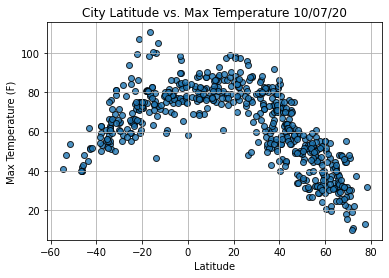

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

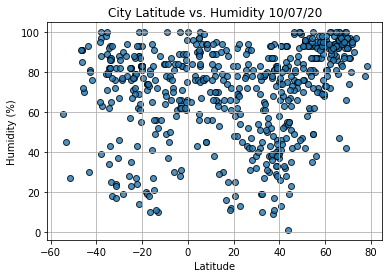

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

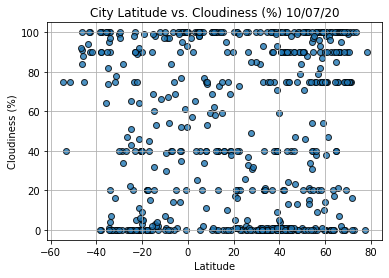

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

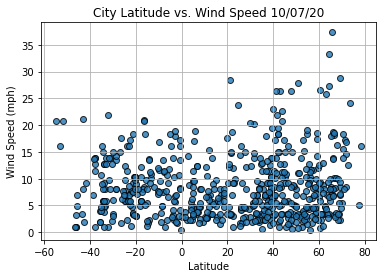

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()